In [1]:
import numpy as np
import matplotlib.pyplot as plt
import roboticstoolbox as rtb
from main import inv_kinematics_2R

class for 2R manipulator

In [2]:
robot = rtb.models.DH.Planar2()
print(robot)

DHRobot: Planar 2 link, 2 joints (RR), dynamics, standard DH parameters
┌─────┬────┬────┬──────┐
│ θⱼ  │ dⱼ │ aⱼ │  ⍺ⱼ  │
├─────┼────┼────┼──────┤
│  q1 │  0 │  1 │ 0.0° │
│  q2 │  0 │  1 │ 0.0° │
└─────┴────┴────┴──────┘

┌──┬──┐
└──┴──┘

┌──────┬──────┬──────┐
│ name │ q0   │ q1   │
├──────┼──────┼──────┤
│   qr │  0°  │  90° │
│   qz │  0°  │  0°  │
│   q1 │  0°  │  90° │
│   q2 │  90° │ -90° │
└──────┴──────┴──────┘



parametric equations of a parabola

In [3]:
a = 2
t = np.linspace(-1,1,100)
x = a*t**2
y = 2*a*t


Text(0, 0.5, 'y')

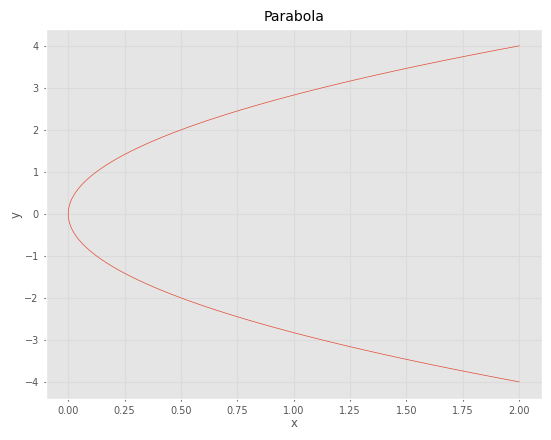

In [4]:
plt.plot(x,y)
plt.title("Parabola")
plt.xlabel("x")
plt.ylabel("y")

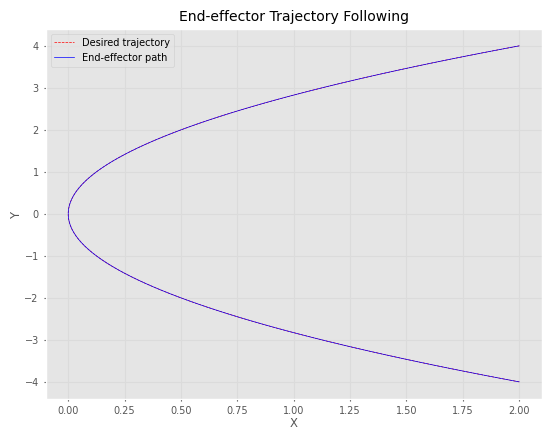

In [9]:
q = np.array([0.0, 0.0], dtype=float)  # initial joint angles (ensure float type)


ee_traj = []

for x_target, y_target in zip(x, y):
    # Compute inverse kinematics to find joint angles
    q_new = inv_kinematics_2R(x_target, y_target)
    q = q_new

    
    ee_traj.append([x_target, y_target])

# Convert to arrays for plotting
ee_traj = np.array(ee_traj)

# Plot the results
plt.figure()
plt.plot(x, y, 'r--', label='Desired trajectory')
plt.plot(ee_traj[:, 0], ee_traj[:, 1], 'b-', label='End-effector path')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('End-effector Trajectory Following')
plt.show()
